In [66]:
# Modify the file 00_setup.py to define input/output file paths on your system
# The information in 00_setup.py will be used across notebooks
from importlib.machinery import SourceFileLoader
setup = SourceFileLoader("setup", "./00_setup.py").load_module()

# DGI vs NAICS Group Explorations
In hierarchical encoding, more general NAICS categories are worse than specific.  For DGI clusters, it's the opposite.  Why? 

See also https://www.peggykern.org/uploads/5/6/6/7/56678211/ftestformulas.pdf

In [67]:
import numpy as np
import pandas as pd
from pathlib import Path
import importlib, os

In [68]:
import seaborn as sns

In [69]:
from sba_gnn.sba_gnn import sg_plot 
sg_plot.plot_defaults()

In [70]:
import matplotlib.pyplot as plt

## Import Data

In [71]:
sba_loans = pd.read_parquet(Path(setup.temp_path).joinpath('01_DATA_transformed.parquet'))

In [72]:
sba_loans.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv',
       'target', 'guaranteed_fract', 'new_business', 'urban_flag',
       'franchise_flag', 'NAICS_2', 'NAICS_sector', 'NAICS_sector_desc',
       'NAICS_num', 'dset', 'dset_naics_holdout', 'NAICS_5', 'NAICS_4',
       'NAICS_3', 'menc_NAICS', 'menc_NAICS_5', 'menc_NAICS_4', 'menc_NAICS_3',
       'menc_NAICS_sector', 'mhier_NAICS',
       'NS___Accommodation and Food Services',
       'NS___Administrative and Support and Waste Management and Remediation Services',
       'NS___Construction', 'NS___Health Care and Social Assistance',
       'NS___Manufacturing',
       'NS___Other Services (except Public Administra

In [73]:
embed_df = pd.read_parquet(Path(setup.temp_path).joinpath('63_DATA_embeddings_tsne_naics.parquet'))

In [74]:
naics_grp_col = ['NAICS_5', 'NAICS_4', 'NAICS_3', 'NAICS_sector']

In [75]:
naics_dgi_col = [c for c in embed_df.columns if c.startswith('cluster_')]

In [76]:
loans_simplified = sba_loans[['LoanNr_ChkDgt', 'target', 'dset', 'dset_naics_holdout', 'NAICS'] +
                          naics_grp_col] \
    .merge(embed_df[['NAICS_orig'] + naics_dgi_col].rename(columns={'NAICS_orig':'NAICS'}),
           on='NAICS')

In [77]:
loans_simplified.head()

,LoanNr_ChkDgt,target,dset,dset_naics_holdout,NAICS,NAICS_5,NAICS_4,NAICS_3,NAICS_sector,cluster_003,cluster_010,cluster_020,cluster_106,cluster_354,cluster_834
0,1000014003,0,train,0,451120,45112,4511,451,44-45,2,2,2,32,222,300
1,1000944000,0,train,0,451120,45112,4511,451,44-45,2,2,2,32,222,300
2,1001095003,1,val,0,451120,45112,4511,451,44-45,2,2,2,32,222,300
3,1004545002,0,train,0,451120,45112,4511,451,44-45,2,2,2,32,222,300
4,1011395003,0,train,0,451120,45112,4511,451,44-45,2,2,2,32,222,300


In [78]:
train_df = loans_simplified[loans_simplified['dset'] == 'train'].copy()

##### Metrics

In [136]:
metrics_df = pd.read_csv(Path(setup.temp_path).joinpath('80_REPORT_metrics_combined.csv'))

##### Group stats

In [137]:
naics_grp_stats_train = pd.read_csv(Path(setup.temp_path).joinpath('02_REPORT_naics_grp_stats_train.csv'))
naics_grp_stats = pd.read_csv(Path(setup.temp_path).joinpath('02_REPORT_naics_grp_stats_all.csv'))

## Summarize Levels for NAICS, DGI

##### NAICS standard

In [138]:
importlib.reload(sg_plot)

<module 'sba_gnn.sba_gnn.sg_plot' from '/Users/valeriecarey/Documents/projects/2023_10_blog_gnn_sba/code/sba_gnn/sba_gnn/sg_plot.py'>

In [139]:
dgi_grp_stats = pd.concat([sg_plot.naics_grp_stats(loans_simplified, c) for c in reversed(naics_dgi_col)],
                      keys=reversed(naics_dgi_col))
dgi_grp_stats.to_csv(Path(setup.temp_path).joinpath('82_REPORT_dgi_grp_stats_all.csv'), index=True)
dgi_grp_stats

count_grp           mean         median  \
cluster_834 loan_count        834.0     825.037170     198.500000   
            target            834.0       0.194650       0.181818   
            low_vol           834.0       0.267386       0.000000   
            naics_count       834.0       1.571942       1.000000   
            single_naics      834.0       0.750600       1.000000   
cluster_354 loan_count        354.0    1943.731638     613.000000   
            target            354.0       0.186311       0.180323   
            low_vol           354.0       0.194915       0.000000   
            naics_count       354.0       3.703390       2.000000   
            single_naics      354.0       0.327684       0.000000   
cluster_106 loan_count        106.0    6491.330189    3719.000000   
            target            106.0       0.182002       0.182612   
            low_vol           106.0       0.132075       0.000000   
            naics_count       106.0      12.367925       8.000000   
            single_naics      106.0       0.084906       0.000000   
cluster_020 loan_count         20.0   34404.050000   31364.000000   
            target             20.0       0.178915       0.173361   
            low_vol            20.0       0.000000       0.000000   
            naics_count        20.0      65.550000      52.000000   
            single_naics       20.0       0.000000       0.000000   
cluster_010 loan_count         10.0   68808.100000   57566.500000   
            target             10.0       0.198404       0.206809   
            low_vol            10.0       0.000000       0.000000   
            naics_count        10.0     131.100000     108.000000   
            single_naics       10.0       0.000000       0.000000   
cluster_003 loan_count          3.0  229360.333333  248600.000000   
            target              3.0       0.189308       0.227860   
            low_vol             3.0       0.000000       0.000000   
            naics_count         3.0     437.000000     423.000000   
            single_naics        3.0       0.000000       0.000000   

                                    min            max            sum  
cluster_834 loan_count         1.000000   27945.000000  688081.000000  
            target             0.000000       1.000000     162.337803  
            low_vol            0.000000       1.000000     223.000000  
            naics_count        1.000000      34.000000    1311.000000  
            single_naics       0.000000       1.000000     626.000000  
cluster_354 loan_count         1.000000   30514.000000  688081.000000  
            target             0.000000       1.000000      65.954049  
            low_vol            0.000000       1.000000      69.000000  
            naics_count        1.000000      57.000000    1311.000000  
            single_naics       0.000000       1.000000     116.000000  
cluster_106 loan_count         1.000000   49511.000000  688081.000000  
            target             0.000000       1.000000      19.292227  
            low_vol            0.000000       1.000000      14.000000  
            naics_count        1.000000      84.000000    1311.000000  
            single_naics       0.000000       1.000000       9.000000  
cluster_020 loan_count       123.000000   95480.000000  688081.000000  
            target             0.056911       0.315166       3.578305  
            low_vol            0.000000       0.000000       0.000000  
            naics_count        5.000000     244.000000    1311.000000  
            single_naics       0.000000       0.000000       0.000000  
cluster_010 loan_count     16308.000000  128618.000000  688081.000000  
            target             0.086351       0.308144       1.984039  
            low_vol            0.000000       0.000000       0.000000  
            naics_count       49.000000     305.000000    1311.000000  
            single_naics       0.000000       0.000000       0.000000  
cluster_003 lo

In [140]:
dgi_grp_stats_train = pd.concat([sg_plot.naics_grp_stats(train_df, c) for c in reversed(naics_dgi_col)],
                      keys=reversed(naics_dgi_col))
dgi_grp_stats_train.to_csv(Path(setup.temp_path).joinpath('82_REPORT_dgi_grp_stats_train.csv'), index=True)
dgi_grp_stats_train

count_grp           mean         median  \
cluster_834 loan_count        757.0     576.116248     148.000000   
            target            757.0       0.193115       0.179579   
            low_vol           757.0       0.324967       0.000000   
            naics_count       757.0       1.540291       1.000000   
            single_naics      757.0       0.755614       1.000000   
cluster_354 loan_count        338.0    1290.295858     434.000000   
            target            338.0       0.182930       0.167184   
            low_vol           338.0       0.218935       0.000000   
            naics_count       338.0       3.449704       2.000000   
            single_naics      338.0       0.334320       0.000000   
cluster_106 loan_count        105.0    4153.523810    2188.000000   
            target            105.0       0.182332       0.179888   
            low_vol           105.0       0.123810       0.000000   
            naics_count       105.0      11.104762       8.000000   
            single_naics      105.0       0.095238       0.000000   
cluster_020 loan_count         20.0   21806.000000   19120.000000   
            target             20.0       0.178318       0.172250   
            low_vol            20.0       0.000000       0.000000   
            naics_count        20.0      58.300000      45.500000   
            single_naics       20.0       0.000000       0.000000   
cluster_010 loan_count         10.0   43612.000000   36565.000000   
            target             10.0       0.196811       0.205109   
            low_vol            10.0       0.000000       0.000000   
            naics_count        10.0     116.600000      96.500000   
            single_naics       10.0       0.000000       0.000000   
cluster_003 loan_count          3.0  145373.333333  161808.000000   
            target              3.0       0.189349       0.227072   
            low_vol             3.0       0.000000       0.000000   
            naics_count         3.0     388.666667     375.000000   
            single_naics        3.0       0.000000       0.000000   

                                   min            max            sum  
cluster_834 loan_count        1.000000   19570.000000  436120.000000  
            target            0.000000       1.000000     146.188064  
            low_vol           0.000000       1.000000     246.000000  
            naics_count       1.000000      31.000000    1166.000000  
            single_naics      0.000000       1.000000     572.000000  
cluster_354 loan_count        1.000000   21378.000000  436120.000000  
            target            0.000000       1.000000      61.830376  
            low_vol           0.000000       1.000000      74.000000  
            naics_count       1.000000      54.000000    1166.000000  
            single_naics      0.000000       1.000000     113.000000  
cluster_106 loan_count        1.000000   34096.000000  436120.000000  
            target            0.000000       1.000000      19.144825  
            low_vol           0.000000       1.000000      13.000000  
            naics_count       1.000000      77.000000    1166.000000  
            single_naics      0.000000       1.000000      10.000000  
cluster_020 loan_count       88.000000   63823.000000  436120.000000  
            target            0.068182       0.317824       3.566360  
            low_vol           0.000000       0.000000       0.000000  
            naics_count       3.000000     220.000000    1166.000000  
            single_naics      0.000000       0.000000       0.000000  
cluster_010 loan_count    11315.000000   85191.000000  436120.000000  
            target            0.086471       0.308202       1.968109  
            low_vol           0.000000       0.000000       0.000000  
            naics_count      47.000000     270.000000    1166.000000  
            single_naics      0.000000       0.000000       0.000000  
cluster_003 loan_count    94626.000000  

## Performance Plots
Show performance vs. k on test set

##### Function to plot a metric vs. # codes in level

In [277]:
def metric_plot_k(data, base_val=None, xlabel=None, ylabel=None,
                 legend_labels = None):
    fig, ax = plt.subplots()
    data.plot(style='o-', ax=ax)
    if base_val is not None:
        xmin, xmax = ax.get_xlim()
        plt.hlines(y=base_val, xmin = xmin * 1.1 , xmax = xmax* 1.1, color='gray')
        ax.set_xlim([xmin, xmax])
    if xlabel is not None:
        ax.set_xlabel(xlabel)
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    if legend_labels is not None:
        ax.legend(title=None, labels=legend_labels, frameon=True)
    else:
        ax.legend(title=None,frameon=True)
    return fig

##### Data prep - baseline values, selected metrics

In [288]:
# baselines
metrics_base_df = metrics_df[(metrics_df['model'] == 'xgb mean') &
                            ~metrics_df['dset_naics_holdout'].isna()] \
        [['model', 'script_num', 'average_precision_score', 'precision_score', 
          'recall_score', 'roc_auc_score', 'dset_naics_holdout', 'start_naics']]
base_ho = metrics_base_df[metrics_base_df['dset_naics_holdout'] == 1] \
    ['average_precision_score'].iloc[0]
base_std = metrics_base_df[metrics_base_df['dset_naics_holdout'] == 0] \
    ['average_precision_score'].iloc[0]
print(f'standard target encoder baselines {base_std} standard, {base_ho} holdout')

standard target encoder baselines 0.3869896746873079 standard, 0.3545977830065921 holdout


In [289]:
metrics_plot_df = metrics_df[~(metrics_df['start_naics'].isna() |
                               metrics_df['dset_naics_holdout'].isna())] \
    [['model', 'script_num',  'average_precision_score', 'precision_score', 
      'recall_score', 'roc_auc_score', 'dset_naics_holdout', 'start_naics']]

In [290]:
metrics_plot_df['model_base'] = metrics_plot_df['model'].apply(lambda x: x.split(':')[0])

In [291]:
# Level counts
naics_counts = naics_grp_stats.rename(columns={'level_0':'start_naics'}) \
    [['start_naics', 'count_grp']].drop_duplicates()
dgi_counts = dgi_grp_stats.reset_index().rename(columns={'level_0':'start_naics'}) \
    [['start_naics', 'count_grp']].drop_duplicates()

##### Hierarchical Encodings starting from different level (same format)

In [292]:
# Plot for varying start

In [293]:
metrics_plot_start_1 = metrics_plot_df[metrics_plot_df['model_base'] \
                                         .isin(['xgb dgi hier v start', 'xgb hier vary start'])] \
    .merge(pd.concat([naics_counts, dgi_counts]), on='start_naics')

In [294]:
metrics_plot_start_2 = metrics_plot_start_1[metrics_plot_start_1['dset_naics_holdout'] == 1] \
    [['model_base', 'count_grp', 'average_precision_score']] \
    .pivot(index=['count_grp'], columns='model_base', values='average_precision_score')

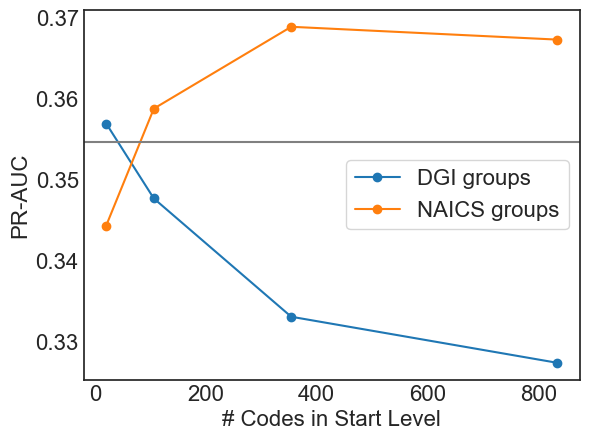

In [331]:
fig = metric_plot_k(metrics_plot_start_2, base_val = base_ho,
                   xlabel = '# Codes in Start Level', ylabel='PR-AUC',
                   legend_labels = ['DGI groups', 'NAICS groups'])
fig.savefig(Path(setup.temp_path).joinpath('82_PLOT_hier_pairs_sel.png'), bbox_inches='tight')

In [296]:
metrics_plot_start_3 = metrics_plot_start_1[metrics_plot_start_1['dset_naics_holdout'] == 0] \
    [['model_base', 'count_grp', 'average_precision_score']] \
    .pivot(index=['count_grp'], columns='model_base', values='average_precision_score')

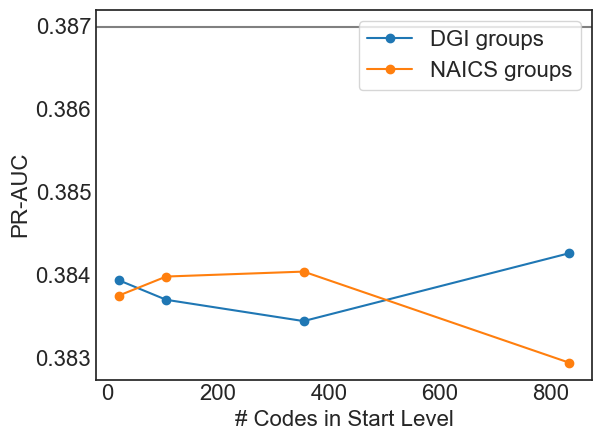

In [297]:
fig = metric_plot_k(metrics_plot_start_3, base_val = base_std,
                   xlabel = '# Codes in Start Level', ylabel='PR-AUC',
                   legend_labels = ['DGI groups', 'NAICS groups'])

##### Same plot, more DGI levels

In [298]:
# Plot for varying start

In [299]:
metrics_plot_start_4 = metrics_plot_df[metrics_plot_df['model_base'] \
                                         .isin(['xgb dgi hier v start (alt)', 'xgb hier vary start'])] \
    .merge(pd.concat([naics_counts, dgi_counts]), on='start_naics')

In [300]:
metrics_plot_start_5 = metrics_plot_start_4[metrics_plot_start_4['dset_naics_holdout'] == 1] \
    [['model_base', 'count_grp', 'average_precision_score']] \
    .pivot(index=['count_grp'], columns='model_base', values='average_precision_score')

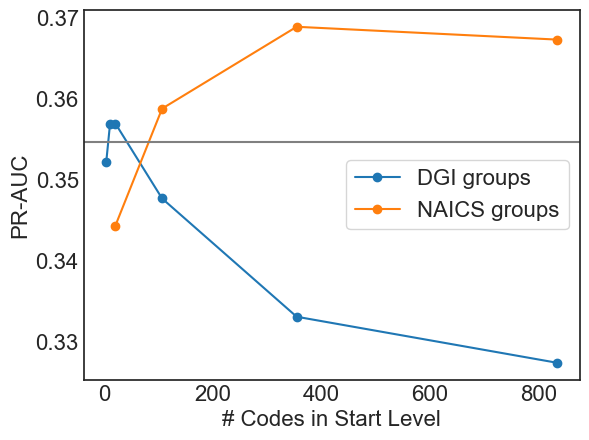

In [330]:
fig = metric_plot_k(metrics_plot_start_5, base_val = base_ho,
                   xlabel = '# Codes in Start Level', ylabel='PR-AUC',
                   legend_labels = ['DGI groups', 'NAICS groups'])
fig.savefig(Path(setup.temp_path).joinpath('82_PLOT_hier_pairs_all.png'), bbox_inches='tight')

In [302]:
metrics_plot_start_6 = metrics_plot_start_4[metrics_plot_start_4['dset_naics_holdout'] == 0] \
    [['model_base', 'count_grp', 'average_precision_score']] \
    .pivot(index=['count_grp'], columns='model_base', values='average_precision_score')

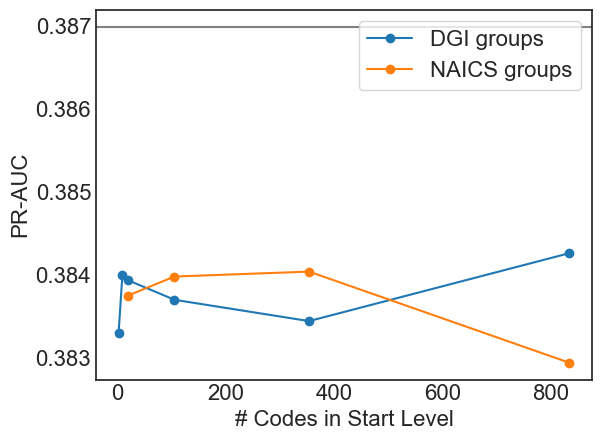

In [303]:
fig = metric_plot_k(metrics_plot_start_6, base_val = base_std,
                   xlabel = '# Codes in Start Level', ylabel='PR-AUC',
                   legend_labels = ['DGI groups', 'NAICS groups'])

##### Same plot, pairwise hierarchies

In [304]:
# Plot for varying start

In [305]:
metrics_plot_pair_1 = metrics_plot_df[metrics_plot_df['model_base'] \
                                         .isin(['xgb hier pair', 'xgb dgi hier pair'])] \
    .merge(pd.concat([naics_counts, dgi_counts]), on='start_naics')

In [306]:
metrics_plot_pair_2 = metrics_plot_pair_1[metrics_plot_pair_1['dset_naics_holdout'] == 1] \
    [['model_base', 'count_grp', 'average_precision_score']] \
    .pivot(index=['count_grp'], columns='model_base', values='average_precision_score')

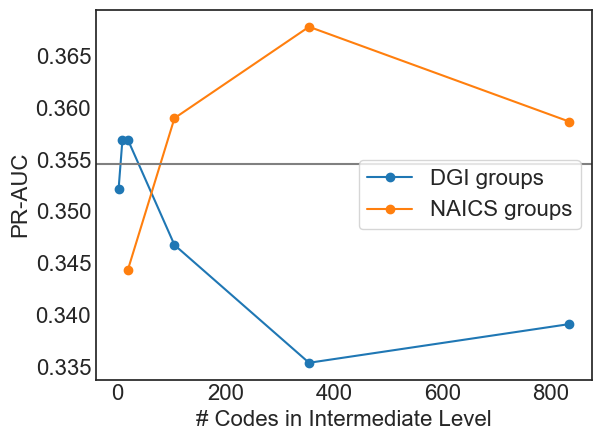

In [307]:
fig = metric_plot_k(metrics_plot_pair_2, base_val = base_ho,
                   xlabel = '# Codes in Intermediate Level', ylabel='PR-AUC',
                   legend_labels = ['DGI groups', 'NAICS groups'])
fig
fig

In [308]:
metrics_plot_pair_3 = metrics_plot_pair_1[metrics_plot_pair_1['dset_naics_holdout'] == 0] \
    [['model_base', 'count_grp', 'average_precision_score']] \
    .pivot(index=['count_grp'], columns='model_base', values='average_precision_score')

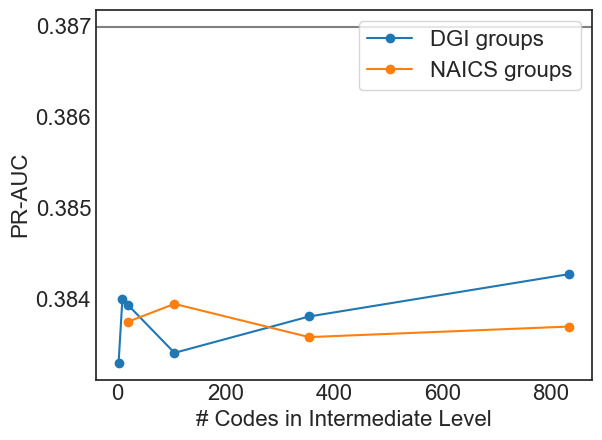

In [309]:
fig = metric_plot_k(metrics_plot_pair_3, base_val = base_std,
                   xlabel = '# Codes in Intermediate Level', ylabel='PR-AUC',
                   legend_labels = ['DGI groups', 'NAICS groups'])

##### Other Scores, for pairwise

In [316]:
base_recall_ho =  metrics_base_df[metrics_base_df['dset_naics_holdout'] == 1] \
    ['recall_score'].iloc[0]
base_recall_std =  metrics_base_df[metrics_base_df['dset_naics_holdout'] == 0] \
    ['recall_score'].iloc[0]

In [311]:
metrics_plot_pair_4 = metrics_plot_pair_1[metrics_plot_pair_1['dset_naics_holdout'] == 1] \
    [['model_base', 'count_grp', 'recall_score']] \
    .pivot(index=['count_grp'], columns='model_base', values='recall_score')

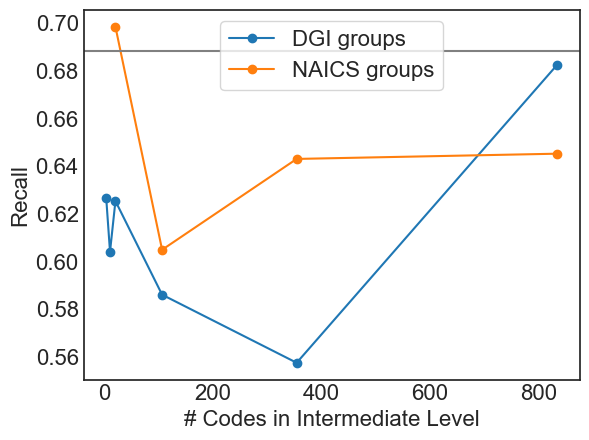

In [312]:
fig = metric_plot_k(metrics_plot_pair_4, base_val = base_recall_ho,
                   xlabel = '# Codes in Intermediate Level', ylabel='Recall',
                   legend_labels = ['DGI groups', 'NAICS groups'])

In [313]:
base_precision_ho =  metrics_base_df[metrics_base_df['dset_naics_holdout'] == 1] \
    ['precision_score'].iloc[0]
base_precision_std =  metrics_base_df[metrics_base_df['dset_naics_holdout'] == 0] \
    ['precision_score'].iloc[0]

In [314]:
metrics_plot_pair_5 = metrics_plot_pair_1[metrics_plot_pair_1['dset_naics_holdout'] == 1] \
    [['model_base', 'count_grp', 'precision_score']] \
    .pivot(index=['count_grp'], columns='model_base', values='precision_score')

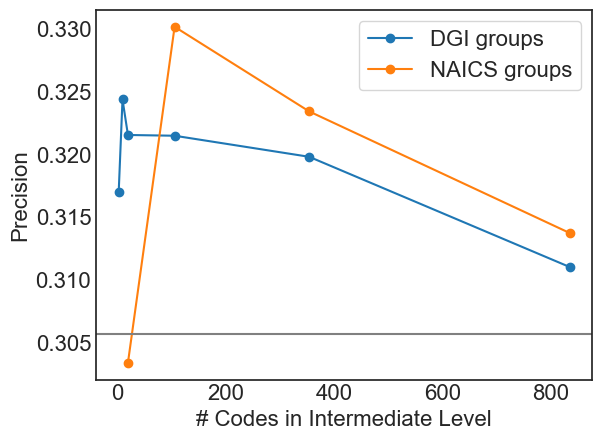

In [318]:
fig = metric_plot_k(metrics_plot_pair_5, base_val = base_precision_ho,
                   xlabel = '# Codes in Intermediate Level', ylabel='Precision',
                   legend_labels = ['DGI groups', 'NAICS groups'])

In [319]:
base_auc_ho =  metrics_base_df[metrics_base_df['dset_naics_holdout'] == 1] \
    ['roc_auc_score'].iloc[0]
base_auc_std =  metrics_base_df[metrics_base_df['dset_naics_holdout'] == 0] \
    ['roc_auc_score'].iloc[0]

In [320]:
metrics_plot_pair_6 = metrics_plot_pair_1[metrics_plot_pair_1['dset_naics_holdout'] == 1] \
    [['model_base', 'count_grp', 'roc_auc_score']] \
    .pivot(index=['count_grp'], columns='model_base', values='roc_auc_score')

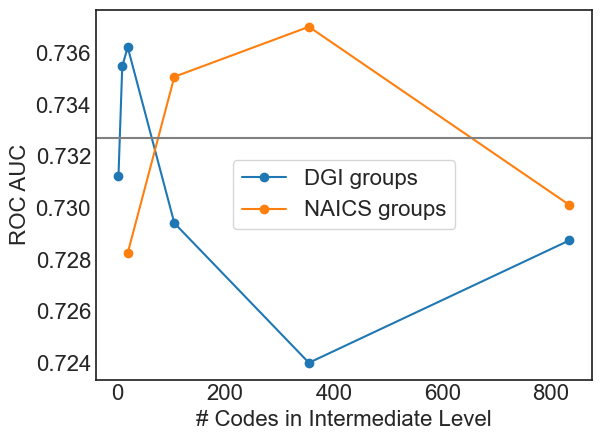

In [328]:
fig = metric_plot_k(metrics_plot_pair_6, base_val = base_auc_ho,
                   xlabel = '# Codes in Intermediate Level', ylabel='ROC AUC',
                   legend_labels = ['DGI groups', 'NAICS groups'])
fig.savefig(Path(setup.temp_path).joinpath('82_PLOT_hier_pairs_roc)all.png'), bbox_inches='tight')